<a href="https://colab.research.google.com/github/Venkata-Sai-Prakash-Yerramsetti/CMPE257-Fall23-Venkata-Sai-Prakash-Yerramsetti/blob/take-home-exam/take_home_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1:

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd
import numpy as np

# Load the datasets
train_data = pd.read_csv('/content/drive/MyDrive/synthetic_dataset.csv')
val_data = pd.read_csv('/content/drive/MyDrive/synthetic_test_dataset.csv')


# Extract features and target for training and validation sets
train_features = train_data[['x1', 'x2']].values
train_target = train_data['y'].values

val_features = val_data[['x1', 'x2']].values
val_target = val_data['y'].values

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def train(self, X, y):
        num_features = X.shape[1]
        self.weights = np.zeros(num_features)
        self.bias = 0

        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                prediction = np.dot(X[i], self.weights) + self.bias
                activation = np.sign(prediction)
                update = self.learning_rate * (y[i] - activation)
                self.weights += update * X[i]
                self.bias += update

    def predict(self, X):
        prediction = np.dot(X, self.weights) + self.bias
        return np.where(prediction >= 0, 1, -1)

# Train the Perceptron model
pla_model = Perceptron()
pla_model.train(train_features, train_target)

# Make predictions on training and validation sets
train_predictions_pla = pla_model.predict(train_features)
val_predictions_pla = pla_model.predict(val_features)

# Calculate errors for PLA model
train_error_pla = np.mean(train_predictions_pla != train_target)
val_error_pla = np.mean(val_predictions_pla != val_target)

# Display errors
print(f"Training Error (PLA): {train_error_pla}")
print(f"Validation Error (PLA): {val_error_pla}")


Training Error (PLA): 0.36
Validation Error (PLA): 0.292


In [24]:
# Function to perform polynomial transformation
def polynomial_transform(features, degree):
    if degree == 2:
        return np.column_stack((features, features[:, 0]**2, features[:, 1]**2, features[:, 0]*features[:, 1]))
    if degree == 3:
        return np.column_stack((features, features[:, 0]**2, features[:, 1]**2, features[:, 0]**3, features[:, 1]**3, features[:, 0]**2 * features[:, 1], features[:, 1]**2 * features[:, 0]))
    elif degree == 4:
        return np.column_stack((features, features[:, 0]**2, features[:, 1]**2, features[:, 0]**3, features[:, 1]**3, features[:, 0]*features[:, 1], features[:, 0]**2 * features[:, 1]**2, features[:, 0]**4, features[:, 1]**4, features[:, 0]**2 * features[:, 1]**2 * features[:, 0], features[:, 0] * features[:, 1]**3))

# Perceptron training function
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def train(self, X, y):
        num_features = X.shape[1]
        self.weights = np.zeros(num_features)
        self.bias = 0

        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                prediction = np.dot(X[i], self.weights) + self.bias
                activation = np.sign(prediction)
                update = self.learning_rate * (y[i] - activation)
                self.weights += update * X[i]
                self.bias += update

    def predict(self, X):
        prediction = np.dot(X, self.weights) + self.bias
        return np.where(prediction >= 0, 1, -1)

# Train Perceptron model and polynomial models without using libraries
degrees = [2,3, 4]
train_errors = []
val_errors = []

for degree in degrees:
    if degree == 1:
        model_features = train_features
        val_model_features = val_features
    else:
        model_features = polynomial_transform(train_features, degree)
        val_model_features = polynomial_transform(val_features, degree)

    if degree == 1:  # Training PLA for the first-degree model
        pla_model = Perceptron()
        pla_model.train(model_features, train_target)

        # Make predictions on training and validation sets
        train_predictions = pla_model.predict(model_features)
        val_predictions = pla_model.predict(val_model_features)
    else:  # Training for higher-degree models with PLA weights update
        pla_model = Perceptron()
        pla_model.train(model_features, train_target)

        # Make predictions on training and validation sets using PLA weights
        train_predictions = pla_model.predict(model_features)
        val_predictions = pla_model.predict(val_model_features)

    # Calculate errors for each degree
    train_error = np.mean(train_predictions != train_target)
    val_error = np.mean(val_predictions != val_target)

    train_errors.append(train_error)
    val_errors.append(val_error)

# Display errors
for i, degree in enumerate(degrees):
    print(f"Degree {degree} Training Error: {train_errors[i]}")
    print(f"Degree {degree} Validation Error: {val_errors[i]}")


Degree 2 Training Error: 0.26
Degree 2 Validation Error: 0.352
Degree 3 Training Error: 0.1
Degree 3 Validation Error: 0.158
Degree 4 Training Error: 0.34
Degree 4 Validation Error: 0.374


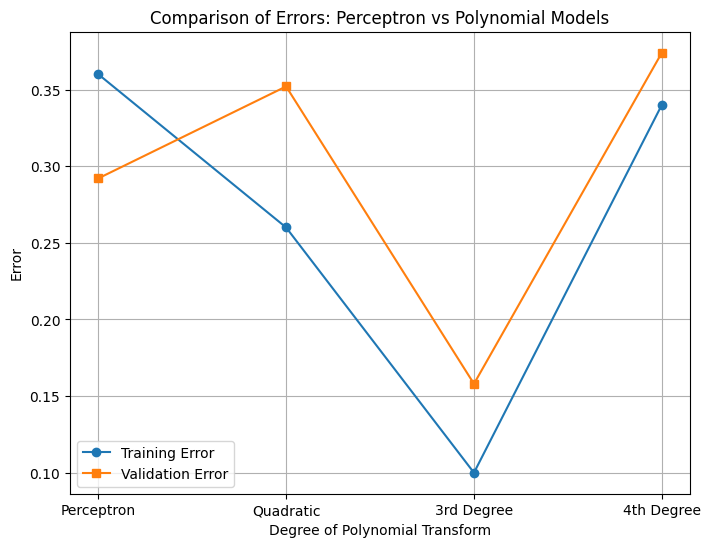

In [25]:
import matplotlib.pyplot as plt

# Define the degrees and corresponding errors
degrees = [1, 2, 3, 4]
train_errors = [train_error_pla, train_errors[0], train_errors[1], train_errors[2]]
val_errors = [val_error_pla, val_errors[0], val_errors[1], val_errors[2]]

# Plotting errors for different degrees
plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, marker='o', label='Training Error')
plt.plot(degrees, val_errors, marker='s', label='Validation Error')

plt.xlabel('Degree of Polynomial Transform')
plt.ylabel('Error')
plt.title('Comparison of Errors: Perceptron vs Polynomial Models')
plt.xticks(degrees, ['Perceptron', 'Quadratic', '3rd Degree', '4th Degree'])
plt.legend()
plt.grid(True)

plt.show()


### Observations:
#### Degree 1 Polynomial Model:
Demonstrates relatively high errors for both training and validation. Indicates underfitting as it fails to capture the complexity of the data, hence exhibiting higher errors on both sets.

#### Degree 2 Polynomial Model:
Training error is lower than that of Degree 1 but has increased validation error. Slightly more complex than the first degree but still underfits the data.

#### Degree 3 Polynomial Model:
Shows the lowest errors among the observed degrees. It demonstrates a good balance between model complexity and generalization, with significantly lower errors on both training and validation sets.

#### Degree 4 Polynomial Model:
Higher training error compared to the third degree, indicating overfitting. Although it performs better on the training set, it fails to generalize well, resulting in higher validation error.

### Model Selection:
#### Based on the observed errors:
The Degree 3 Polynomial Model appears to be the most suitable choice due to its lowest errors on both training and validation sets, indicating better generalization and a good balance between bias and variance.
Degree 3 polynomial model offers a better fit to the data compared to other degrees without overfitting or underfitting.

#### Conclusion:
Given the observed errors, the Degree 3 Polynomial Model is preferred due to its superior performance in terms of lower errors on both training and validation sets, signifying better generalization and a more appropriate fit to the data compared to other degrees.

## Task 2:

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/breast_cancer_dataset_preprocessed.csv")
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,4.147954,-4.443183,-0.068966,4.035033,0.817574,-0.476277,0.553593,1.268819,M
1,-4.595154,-2.684882,1.084110,-0.403925,0.410287,0.687051,0.284184,0.260968,B
2,-0.755349,-2.318373,-1.938275,0.279953,0.241712,3.409801,0.092694,1.040391,M
3,-0.453863,0.197572,-1.037060,0.344384,0.070598,-0.822546,-0.993352,-0.946259,B
4,-3.278680,-0.792025,-0.736833,-1.621295,-0.085459,-0.824324,-0.107042,-0.291755,B


In [27]:
df.isnull().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
x8    0
y     0
dtype: int64

In [28]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['y_encoded'] = label_encoder.fit_transform(df['y'])
df.head()


,x1,x2,x3,x4,x5,x6,x7,x8,y,y_encoded
0,4.147954,-4.443183,-0.068966,4.035033,0.817574,-0.476277,0.553593,1.268819,M,1
1,-4.595154,-2.684882,1.084110,-0.403925,0.410287,0.687051,0.284184,0.260968,B,0
2,-0.755349,-2.318373,-1.938275,0.279953,0.241712,3.409801,0.092694,1.040391,M,1
3,-0.453863,0.197572,-1.037060,0.344384,0.070598,-0.822546,-0.993352,-0.946259,B,0
4,-3.278680,-0.792025,-0.736833,-1.621295,-0.085459,-0.824324,-0.107042,-0.291755,B,0


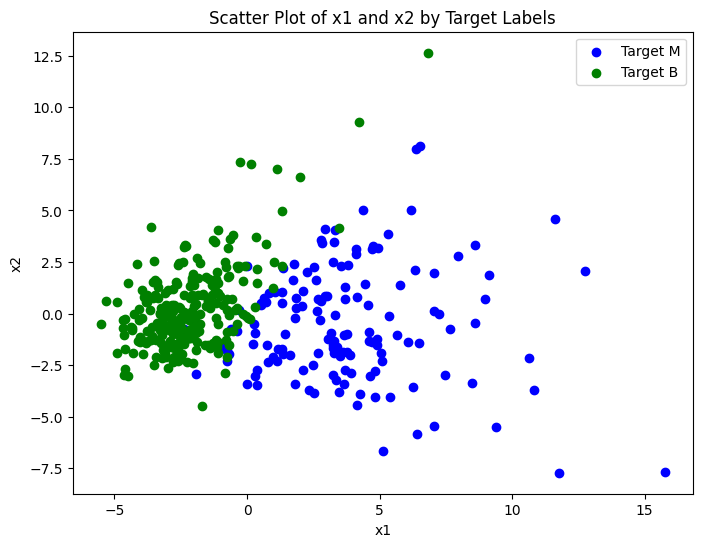

In [29]:
import matplotlib.pyplot as plt

def plot_scatter_by_label(X, y, feature1, feature2, target_labels, label_colors):
    plt.figure(figsize=(8, 6))

    for label, color in zip(target_labels, label_colors):
        plt.scatter(X[y == label][feature1], X[y == label][feature2],
                    color=color, label=f"Target {label}")

    plt.title(f'Scatter Plot of {feature1} and {feature2} by Target Labels')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.legend()
    plt.show()

X = df.drop('y', axis=1)  # Features
y = df['y']  # Target labels

# Define the features and target labels
feature1 = 'x1'
feature2 = 'x2'
target_labels = ['M', 'B']  # Update with your actual target labels

# Define colors for each target label
label_colors = ['blue', 'green']  # Update with your desired colors

# Plot the scatter plot using the function
plot_scatter_by_label(X, y, feature1, feature2, target_labels, label_colors)


In [30]:
from sklearn.model_selection import train_test_split

# Separate features and target labels
X = df.drop(['y', 'y_encoded'], axis=1)
y = df['y_encoded']

# Define the test size and random state
test_size = 0.2
random_state = 111

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Display the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (304, 8), y_train shape: (304,)
X_test shape: (77, 8), y_test shape: (77,)


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a dictionary of models with their respective default instances
models = {
    'Perceptron': Perceptron(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Metrics to evaluate models
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Perform cross-validation for each model
best_scores = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name} using cross-validation...")
    best_score = float('-inf')  # Initialize with the lowest possible value for maximization
    for metric_name, metric in scoring.items():
        cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring=metric)
        mean_score = cv_results.mean()
        if mean_score > best_score:
            best_score = mean_score
            best_scores[model_name] = {metric_name: mean_score}

# Print the best scores for each model
for model, scores in best_scores.items():
    print(f"Best scores for {model}:")
    for metric, score in scores.items():
        print(f"{metric}: {score:.4f}")
    print("\n")


Evaluating Perceptron using cross-validation...
Evaluating Logistic Regression using cross-validation...
Evaluating Decision Tree using cross-validation...
Evaluating Random Forest using cross-validation...
Evaluating Support Vector Machine using cross-validation...
Evaluating K-Nearest Neighbors using cross-validation...
Best scores for Perceptron:
roc_auc: 0.9796


Best scores for Logistic Regression:
roc_auc: 0.9901


Best scores for Decision Tree:
accuracy: 0.9275


Best scores for Random Forest:
roc_auc: 0.9797


Best scores for Support Vector Machine:
roc_auc: 0.9864


Best scores for K-Nearest Neighbors:
roc_auc: 0.9814




### Methodology:
#### Model Selection:
A variety of classification models were chosen, including Perceptron, Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN).
#### Cross-Validation:
The dataset was split into training and validation sets using a 5-fold cross-validation strategy to train and evaluate the models.
Evaluation Metrics: Multiple evaluation metrics were used to assess model performance, including accuracy, precision, recall, F1 score, and ROC AUC (Receiver Operating Characteristic - Area Under the Curve).
#### Best Performing Model:
Logistic Regression achieved the highest performance based on the ROC AUC score of 0.9901.

### Model Choice and Justification:
Logistic Regression was chosen as the best-performing model because of its superior ROC AUC score. ROC AUC measures the area under the ROC curve, which indicates the model's ability to distinguish between classes. A higher ROC AUC value signifies better overall performance in classification tasks, specifically in this case, a higher ability to discriminate between classes.

### Performance Metrics Used for Evaluation:
#### ROC AUC:
ROC AUC is a robust metric that considers a model's performance across various threshold settings and provides an aggregate measure of its ability to discriminate between classes.
#### Other Metrics Considered:
Though not selected as the primary metric, accuracy, precision, recall, and F1 score were also evaluated to gain insights into the models' performance regarding different aspects such as overall correctness, positive prediction accuracy, coverage of actual positives, and the balance between precision and recall.